/home/eurismar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


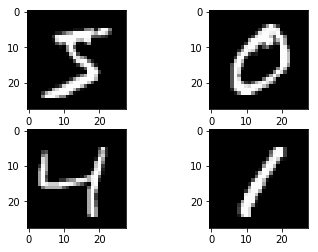

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

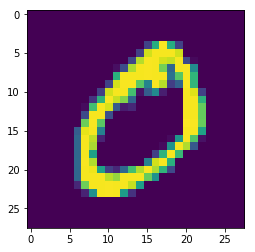

In [8]:
plt.imshow(X_train[1])
# show the plot
plt.show()

In [10]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [12]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [17]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [18]:
num_pixels

784

In [19]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [24]:
import numpy as np

In [26]:
np.argmax(y_train[0])

5

In [31]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal' , activation='relu' ))
    model.add(Dense(num_classes, kernel_initializer='normal' , activation='softmax' ))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model = baseline_model()

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0061 - acc: 0.9989 - val_loss: 0.0637 - val_acc: 0.9801
Epoch 2/10
 - 2s - loss: 0.0041 - acc: 0.9995 - val_loss: 0.0603 - val_acc: 0.9823
Epoch 3/10
 - 2s - loss: 0.0026 - acc: 0.9999 - val_loss: 0.0605 - val_acc: 0.9827
Epoch 4/10
 - 2s - loss: 0.0024 - acc: 0.9997 - val_loss: 0.0626 - val_acc: 0.9829
Epoch 5/10
 - 2s - loss: 0.0059 - acc: 0.9982 - val_loss: 0.0888 - val_acc: 0.9765
Epoch 6/10
 - 2s - loss: 0.0130 - acc: 0.9958 - val_loss: 0.0744 - val_acc: 0.9800
Epoch 7/10
 - 2s - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0683 - val_acc: 0.9805
Epoch 8/10
 - 2s - loss: 0.0039 - acc: 0.9991 - val_loss: 0.0661 - val_acc: 0.9828
Epoch 9/10
 - 2s - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0652 - val_acc: 0.9837
Epoch 10/10
 - 2s - loss: 4.7701e-04 - acc: 1.0000 - val_loss: 0.0631 - val_acc: 0.9842
Baseline Error: 1.58%


In [37]:
(X_train_a, y_train_a), (X_test_a, y_test_a) = mnist.load_data()

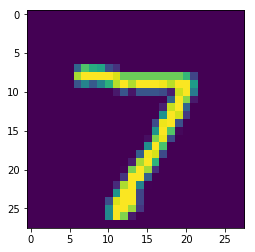

In [53]:
plt.imshow(minha_imagem)
# show the plot
plt.show()

In [69]:
pred = model.predict(X_test)

In [70]:
pred[0]

array([1.6915481e-11, 1.6009260e-12, 3.7237187e-09, 3.8571579e-07,
       2.0528905e-16, 2.6472201e-12, 2.0711699e-17, 9.9999964e-01,
       4.6707832e-10, 2.6775349e-09], dtype=float32)

In [104]:
pred[0]*10000000000000000

array([1.69154812e+05, 1.60092599e+04, 3.72371867e+07, 3.85715794e+09,
       2.05289049e+00, 2.64722012e+04, 2.07116993e-01, 9.99999642e+15,
       4.67078320e+06, 2.67753486e+07])

In [71]:
numpy.argmax(pred[0])

7

In [72]:
a = pred[0]

In [73]:
a

array([1.6915481e-11, 1.6009260e-12, 3.7237187e-09, 3.8571579e-07,
       2.0528905e-16, 2.6472201e-12, 2.0711699e-17, 9.9999964e-01,
       4.6707832e-10, 2.6775349e-09], dtype=float32)

In [74]:
a * 255

array([4.31344782e-09, 4.08236139e-10, 9.49548280e-07, 9.83575301e-05,
       5.23487063e-14, 6.75041134e-10, 5.28148336e-15, 2.54999908e+02,
       1.19104975e-07, 6.82771372e-07], dtype=float32)

In [83]:
t = X_test[0]

In [ ]:
t

In [90]:
X_test.shape

(10000, 784)

In [91]:
t = X_test[0]

In [92]:
t.shape

(784,)

In [94]:
u = t.reshape(28,28)

In [96]:
u = u * 255

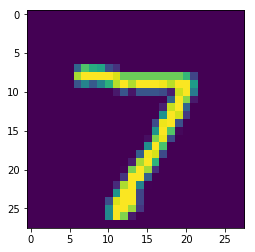

In [97]:
plt.imshow(u)
# show the plot
plt.show()

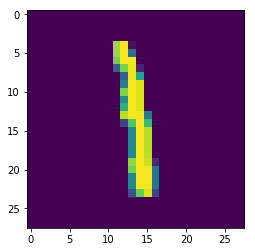

In [220]:
i = numpy.random.randint(100)
imagem = X_test[i].reshape(28,28)
plt.imshow(imagem)
# show the plot
plt.show()

In [221]:
numpy.argmax(pred[i])

1

In [222]:
numpy.argmax(y_test[i])

1